Comparisons of locomotion predictions of different mechanistic latent variable models.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from disp import set_plot


REG_KEY = 'ridge_alpha_10'

TARG_BHV = 'MTN'
TWDWS = [.03, 1, 60]
TARGS = [f'{TARG_BHV}_MN_{twdw}' for twdw in TWDWS]

PFX_BHV = f'data/simple/behav_xtd/behav_xtd'

MASKED = True

# Basic comparison of single vs population fits using different neural models.

In [2]:
FSTRAIN = 'data/simple/strains.csv'

STRAINS_ALL = [
    ['NM91'],
    ['NM91', 'ZH23'],
    ['NM91', 'ZH23', 'CarM03'],
    ['NM91', 'ZH23', 'CarM03', 'ZW109'],
]
NS_TOTAL = [47, 87, 129, 166]

# STRAINS_ALL = [
#     ['NM91'],
#     ['NM91', 'ZH23'],
#     ['NM91', 'ZH23', 'CSTul'],
#     ['NM91', 'ZH23', 'CSTul', 'CarM03'],
# ]
# NS_TOTAL = [47, 87, 121, 163]


# STRAINS_ALL = [
#     ['CSTul'],
#     ['CSTul', 'CarM03'],
#     ['CSTul', 'CarM03', 'NM91'],
#     ['CSTul', 'CarM03', 'NM91', 'ZH23'],
# ]
# NS_TOTAL = [34, 76, 123, 163]

In [3]:
NNRN = 224
NRL_MDLS = [
    'linma',  # linear neural model w MA-derived filters
    # 'lnma',  # lin-nonlin neural model w MA-derived filters
    'lnma_tweaked',  # lin-nonlin neural model w MA-derived filters
    'ma',  # mult-adapt neural model
]

LABELS = {
    'ma': 'MA',
    'lnma': 'LN',
    'lnma_tweaked': 'LN',
    'linma': 'Lin',
    'MTN': 'Motion',
}

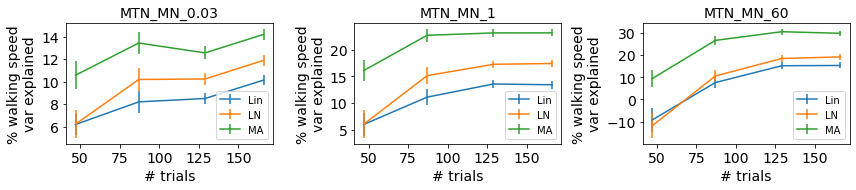

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(12, 2.75), tight_layout=True)

for nrl_mdl in NRL_MDLS:
    r2_mns = {targ: [] for targ in TARGS}
    r2_sems = {targ: [] for targ in TARGS}
    
    for STRAINS in STRAINS_ALL:
        STRAIN_KEY = '_'.join(STRAINS).lower()

        if not MASKED:
            ppln_rslt = np.load(f'data/simple/mlv/neur_basic/by_strain/baker_{nrl_mdl}_{STRAIN_KEY}_{TARG_BHV.lower()}_{REG_KEY}.npy', allow_pickle=True)[0]
        else:
            ppln_rslt = np.load(f'data/simple/mlv/neur_basic/by_strain/baker_{nrl_mdl}_{STRAIN_KEY}_{TARG_BHV.lower()}_{REG_KEY}_masked.npy', allow_pickle=True)[0]

        for targ in TARGS:
            # labels.append(f'{LABELS[nrl_mdl]} (pop)')
            r2_mns[targ].append(ppln_rslt['r2_test'][targ].mean())
            r2_sems[targ].append(ppln_rslt['r2_test'][targ].std() / np.sqrt(ppln_rslt['nsplit']))
        
    for ax, targ in zip(axs, TARGS):
        ax.errorbar(NS_TOTAL, 100*np.array(r2_mns[targ]), yerr=100*np.array(r2_sems[targ]))
        
        set_plot(ax, x_label='# trials', y_label='% walking speed\nvar explained', title=f'{targ}', font_size=14)
        
for ax in axs:
    ax.legend([LABELS[nrl_mdl] for nrl_mdl in NRL_MDLS])
    
fig.savefig('supp/12_fmtn_var_xpl_vs_n_trials.svg')